### Jorge Gerardo Iglesias Ortiz - A01653261
### Alejandro Hernández De la Torre - A01651516
### Santiago Orozco Quintero - A01658308
### Carlos Andres Barredeaz Rios - A01653183
### Jorge Yepez Frutos - A01652661

# Actividad Evaluable Patrones con K-means

## 1. Carga tus datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

df1 = pd.read_csv('analisis.csv')
df2 = pd.read_csv('avocado.csv')

Se cargaron los datos de análisis y avocado

## 2. Si determinas que alguna variable no sirve basándose en la actividad pasada, elimínala y justifica por qué quitaste o no variables.

In [2]:
df2[["year","Date"]]

,year,Date
0,2015,2015-12-27
1,2015,2015-12-20
2,2015,2015-12-13
3,2015,2015-12-06
4,2015,2015-11-29
...,...,...
18244,2018,2018-02-04
18245,2018,2018-01-28
18246,2018,2018-01-21
18247,2018,2018-01-14


Year, esta información ya puede apreciarse en el campo date

## 3. Determina un valor de k.
## 4. Utilizando scikitlearn calcula los centros del algoritmo k-means.

### Análisis.csv

In [3]:
X = np.array(df1[["op","ex","ag"]])
y = np.array(df1['categoria'])
X.shape

(140, 3)

C:\Users\JGIO\AppData\Local\Temp\ipykernel_10996\724161956.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


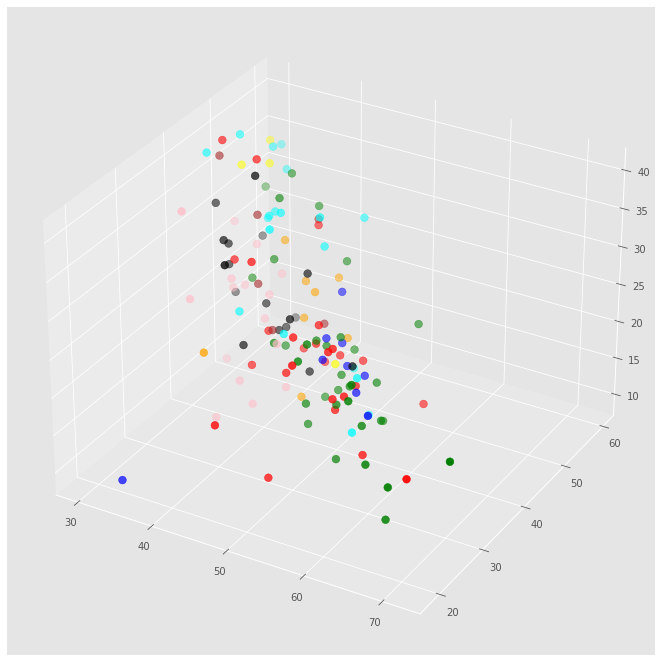

In [4]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[int(row)])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

C:\Users\JGIO\anaconda3\envs\TC1002S\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


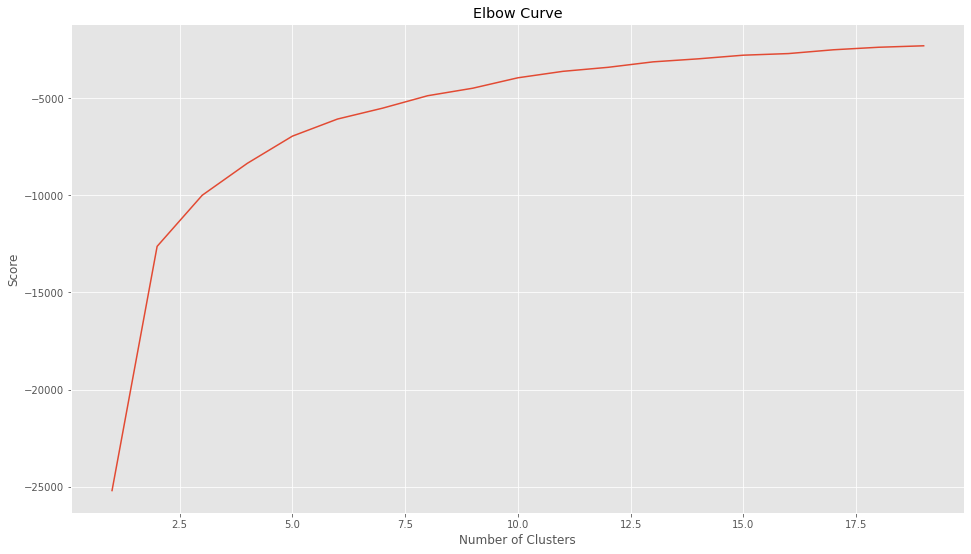

In [5]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [6]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[50.29293117 40.88830576 17.44525734]
 [39.86615385 44.50444971 25.91589424]
 [34.42479832 48.2270434  34.58864788]
 [58.70462307 30.53566167 15.72207033]
 [42.37576048 34.14948304 20.4660282 ]]


C:\Users\JGIO\AppData\Local\Temp\ipykernel_10996\3420450788.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


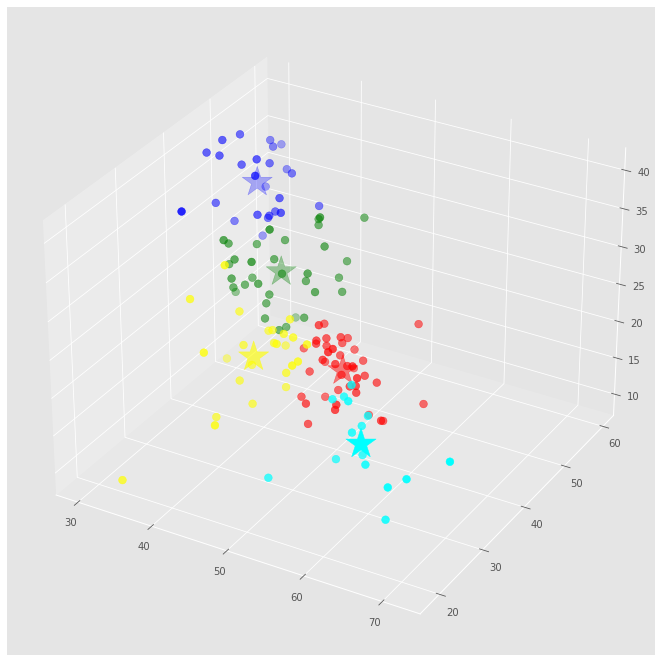

In [7]:
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

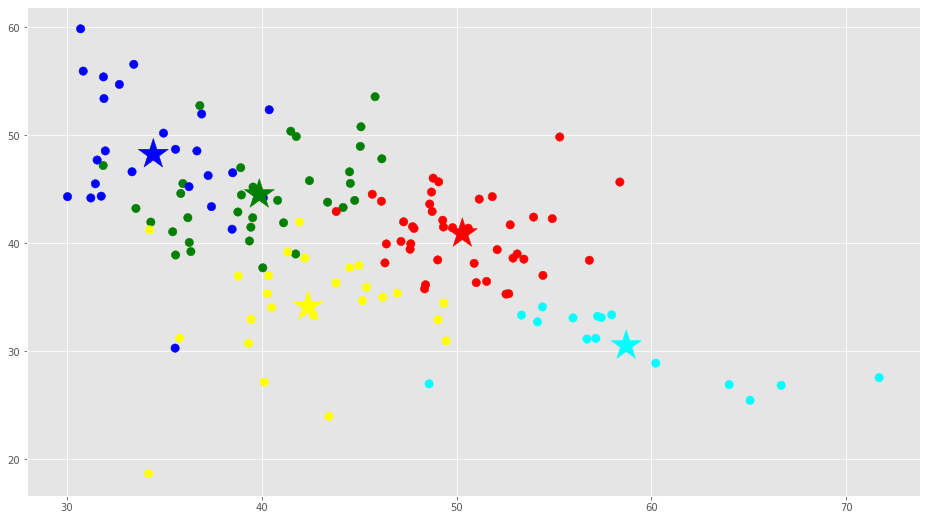

In [8]:
f1 = df1['op'].values
f2 = df1['ex'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

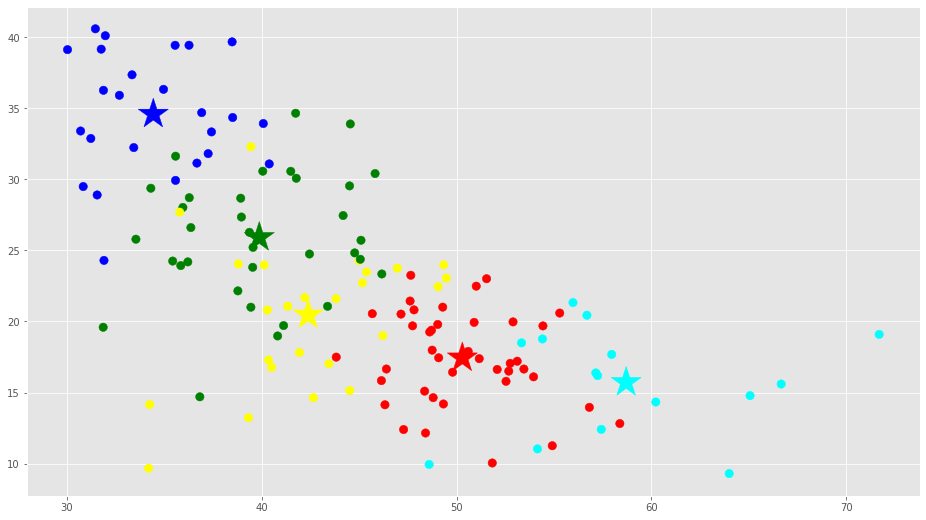

In [9]:
f1 = df1['op'].values
f2 = df1['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

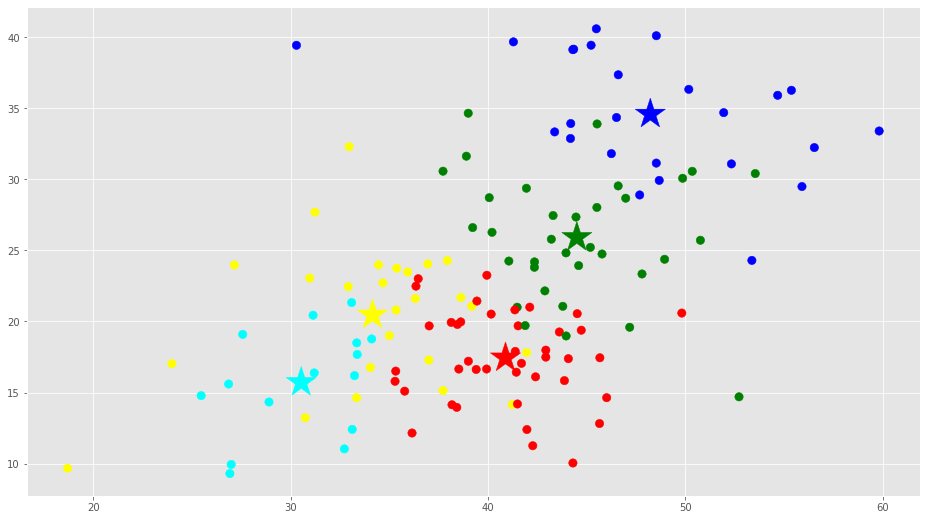

In [10]:
f1 = df1['ex'].values
f2 = df1['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [11]:
copy =  pd.DataFrame()
copy['usuario']=df1['usuario'].values
copy['categoria']=df1['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,41
1,green,34
2,blue,25
3,cyan,15
4,yellow,25


In [12]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,11.0
2,2,15.0
3,3,6.0
4,4,3.0
5,5,1.0
6,6,2.0
7,7,2.0
8,8,NaN
9,9,1.0


In [13]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([ 21, 107,  35,  82,  91], dtype=int64)

In [14]:
users=df1['usuario'].values
for row in closest:
    print(users[row])

carmenelectra
Pablo_Iglesias_
DaniMateoAgain
JudgeJudy
kobebryant


In [15]:
X_new = np.array([[45.92,57.74,15.66]])
 
new_labels = kmeans.predict(X_new)
print(new_labels)

[0]


### Avocado.csv

In [16]:
X = np.array(df2[["Total Volume","Total Bags","year"]])
y = np.array(df2['AveragePrice'])
X.shape

(18249, 3)

In [17]:
min(list(np.array(df2['AveragePrice'])))
#print(max(list(np.array(df2['AveragePrice']))))

0.44

C:\Users\JGIO\AppData\Local\Temp\ipykernel_10996\3357876766.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


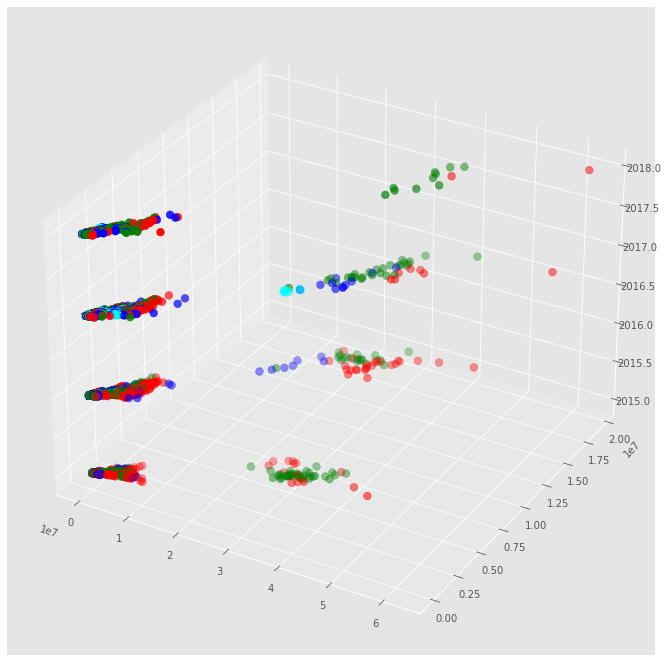

In [18]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
miny = min(list(np.array(df2['AveragePrice'])))
maxy = max(list(np.array(df2['AveragePrice'])))
for row in y:
    asignar.append(colores[int((float(row)-miny)*(12/maxy))])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

[KMeans(n_clusters=1), KMeans(n_clusters=2), KMeans(n_clusters=3), KMeans(n_clusters=4), KMeans(n_clusters=5), KMeans(n_clusters=6), KMeans(n_clusters=7), KMeans(), KMeans(n_clusters=9), KMeans(n_clusters=10), KMeans(n_clusters=11), KMeans(n_clusters=12), KMeans(n_clusters=13), KMeans(n_clusters=14), KMeans(n_clusters=15), KMeans(n_clusters=16), KMeans(n_clusters=17), KMeans(n_clusters=18), KMeans(n_clusters=19)]
[-2.3539280575142698e+17, -3.726427607272761e+16, -1.4208643635568618e+16, -9993639818535234.0, -7143527607280118.0, -5728446638549083.0, -4397870444272364.0, -3658315212674352.5, -3120545214480066.0, -2710850155591321.0, -2395660182835217.0, -2082357047608737.2, -1892348622104907.2, -1715992828082251.0, -1582665062040866.0, -1491160561337514.8, -1365551720488996.0, -1267206866744987.0, -1160662646293287.2]


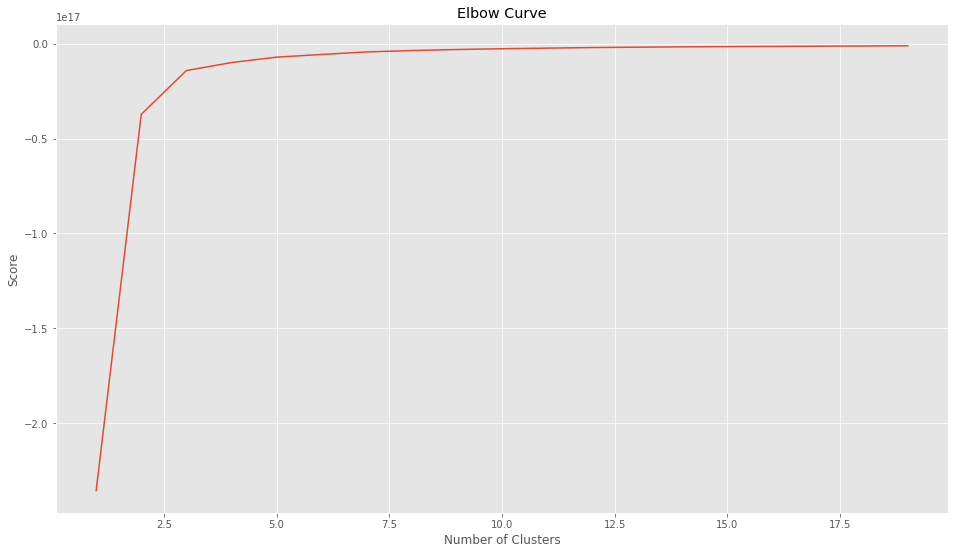

In [19]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
print(kmeans)
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
print(score)
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [20]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[2.40087076e+05 7.20529553e+04 2.01614596e+03]
 [3.37350390e+07 9.19049275e+06 2.01614793e+03]
 [4.45007684e+06 1.23738713e+06 2.01617281e+03]]


C:\Users\JGIO\AppData\Local\Temp\ipykernel_10996\1405421501.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


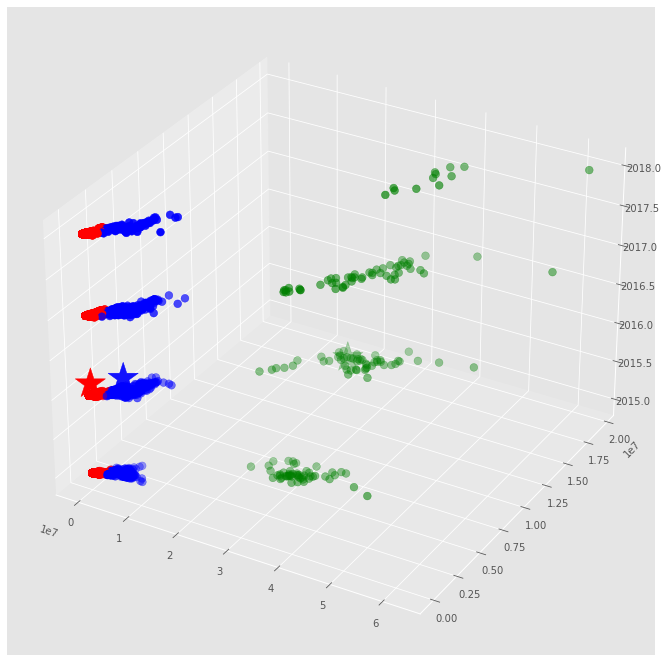

In [21]:
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

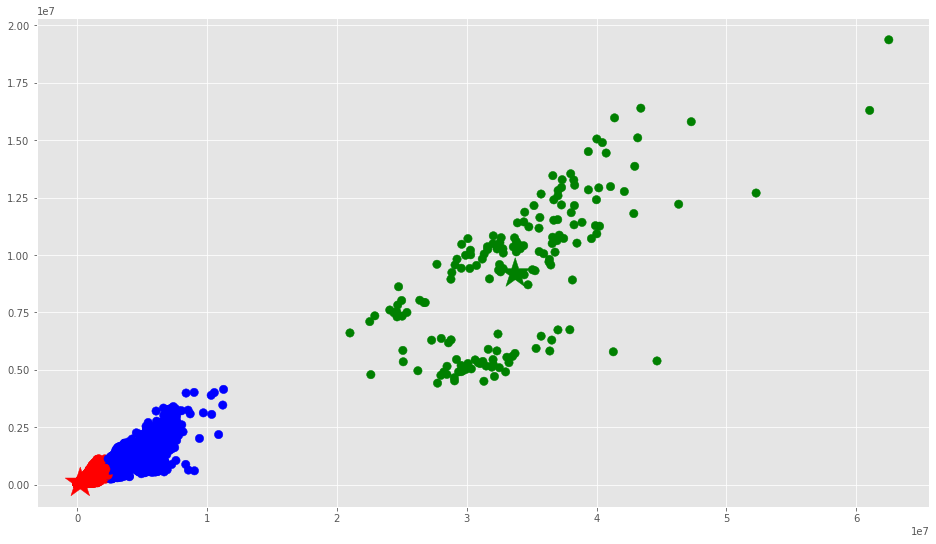

In [22]:
f1 = df2['Total Volume'].values
f2 = df2['Total Bags'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

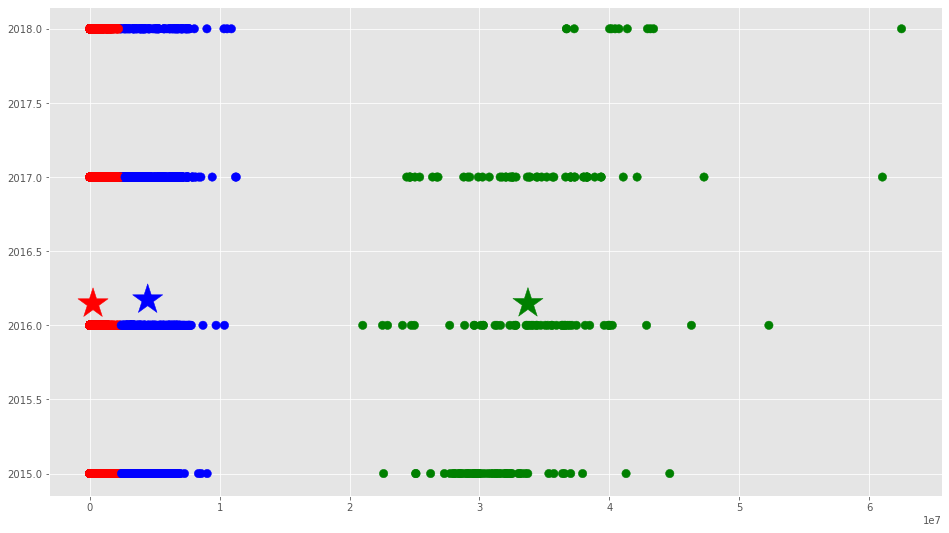

In [23]:
f1 = df2['Total Volume'].values
f2 = df2['year'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

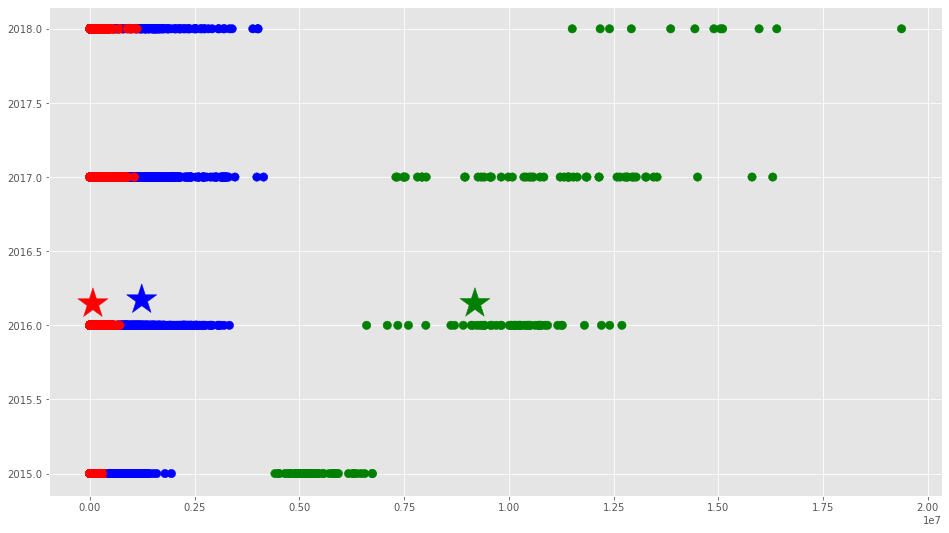

In [24]:
f1 = df2['Total Bags'].values
f2 = df2['year'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [25]:
copy =  pd.DataFrame()
copy['region']=df2['region'].values
copy['AveragePrice']=df2['AveragePrice'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,16778
1,green,169
2,blue,1302


In [26]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['AveragePrice']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('AveragePrice').size()
diversidadGrupo

,AveragePrice,cantidad
0,0,NaN
1,1,143.0
2,2,59.0
3,3,2.0
4,4,NaN
5,5,NaN
6,6,NaN
7,7,NaN
8,8,NaN
9,9,NaN


In [27]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([4190, 5498, 1532], dtype=int64)

In [28]:
users=df2['region'].values
for row in closest:
    print(users[row])

Nashville
TotalUS
Northeast


## Basado en los centros responde las siguientes preguntas:

* ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?

Si, porque de manera similar a como se hace con el diagrama de cajas nos muestra una tendencia en los datos para poder hacer inferencias sobre ellos basados en la proximidad con otro conjunto de valores.

* ¿Cómo obtuviste el valor de k a usar?

Como se vio anteriormente, utilizamos los comandos de Kmeans dentro de la librería de SciKitLearn con la cual devuelve los valores de la k a usar a partir de los parámetros dados. Para un entendimiento mejor se podrían observar los resultados obtenidos en los puntos 3 y 4.

* ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?

No debido a que los grupos de valores que se encontraron no eran tan numerosos de modo que si implementamos una k más grande los grupos serían tan numerosos que la información proporcionada por observar la distribución de estos mismos no sería significativa.

* ¿Qué distancia tienen los centros entre sí? ¿Hay alguno que esté muy cercano a otros?

In [29]:
def distancia3d(p1, p2):
    l = pow((p2[0]-p1[0])**2+(p2[1]-p1[1])**2+(p2[2]-p1[2])**2,0.5)
    return l

centroidsl = centroids.tolist()
for i in range(2):
    for j in range(i+1,3):
        print(f'Punto {i+1} y Punto {j+1}')
        print(distancia3d(centroidsl[i],centroidsl[j]))

Punto 1 y Punto 2
34713941.678482994
Punto 1 y Punto 3
4368296.8742654165
Punto 2 y Punto 3
30345689.906663775


De lo que se puede observar, es que los centroides siendo punto 2 y 3 son los más cercanos entre sí, mientras que los centroides siendo los puntos 1 y 3 son los mas lejanos.

* ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?

Estarían muy despegados unos de otros abarcando un rango de valores muy amplios por lo que no podríamos tener información importante sobre el comportamiento de los datos por la amplitud del intervalo de valores.

* ¿Qué puedes decir de los datos basándose en los centros?

Los centros nos indican la tendencia de relación que tienen unos valores con otros por lo que al verlos podemos saber qué tan parecidos entre sí son los valores que se encuentran próximos a dicho centro, en el caso particular de los datos que graficamos podemos denotar cual es la relación que hubo entre el precio del producto, la cantidad vendida y el año en que se produjo lo cual nos permite apreciar tendencias en el precio según la cosecha y el volumen del producto.